## API CALL 

In [2]:
import requests
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pylab as plt
%matplotlib inline

In [3]:
YOUR_CLIENT_ID = "ORUS32KYCO0PJDB2U4XAKN0NMXJ43GQKGQ2NXLBCQS2D4HPX"
YOUR_CLIENT_SECRET = "DBMVVBZSSTXVIGRDZ35USM4IRJDIF2C3LJ3N4DHLPTCWVERN"

In [4]:

response = requests.get("https://api.foursquare.com/v2/venues/search?ll=40.7,-74&radius=1000&limit=50&query=indian&oauth_token=CLDJS1EPGBWYLSENQG00GUCJI2M1YBPAOARALHZPLQQWNHBK&v=20170614")
data = response.json()

In [5]:
fname = "new_york_city_taxi_relief_stations.geojson"
shape = "Relief_stands_lines/Relief_stand_line.shp"

df = gpd.read_file(shape)

In [6]:
df["lat"] = df.geometry.apply(lambda x: str(x).split(" ")[2][1:])
df["lon"] = df.geometry.apply(lambda x: str(x).split(" ")[3][:-1])
df.head()

,AltMode,Base,Clamped,Extruded,FolderPath,Name,OID_,PopupInfo,Shape_Leng,Snippet,SymbolID,geometry,lat,lon
0,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,1,0,East 23rd Street between First Avenue and Seco...,0.002445,None,0,LINESTRING Z (-73.98084999999998 40.7378927000...,-73.98084999999998,40.7378927000000
1,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,2,0,45th Avenue between Jackson Avenue and 23rd St...,0.001405,None,0,LINESTRING Z (-73.94529329999995 40.7469156000...,-73.94529329999995,40.7469156000000
2,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,3,0,"W.55 Street, between Tenth Avenue and Eleventh...",0.003020,None,0,LINESTRING Z (-73.99231369999995 40.7690205000...,-73.99231369999995,40.7690205000000
3,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,4,0,East 77th Street between First Avenue and Seco...,0.002468,None,0,LINESTRING Z (-73.95369529999994 40.7710478000...,-73.95369529999994,40.7710478000000
4,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,5,0,East 78th Street between Lexington Avenue and ...,0.001648,None,0,LINESTRING Z (-73.95934939999995 40.7742592000...,-73.95934939999995,40.7742592000000


## Get nearby Indian restaurants (500 meters)

In [7]:
lis_number = []

for ll in df[["lat","lon"]].values:
    url = "https://api.foursquare.com/v2/venues/search?ll=" + "%s,%s&radius=500&limit=50&query=%s&oauth_token=CLDJS1EPGBWYLSENQG00GUCJI2M1YBPAOARALHZPLQQWNHBK&v=20170614"%(ll[1], ll[0],'indian')    
    response = requests.get(url)
    data = response.json()
    lis_number.append(len(data['response']['venues']))

df["number_of_indian_restaurants"]=lis_number

## Get nearby cheap restaurants with less than $$10 

In [8]:
lis_cheap = []

for ll in df[["lat","lon"]].values:
    url = "https://api.foursquare.com/v2/venues/search?ll=" + "%s,%s&price=1&radius=500&limit=50&offset=1&query=%s&oauth_token=CLDJS1EPGBWYLSENQG00GUCJI2M1YBPAOARALHZPLQQWNHBK&v=20170614"%(ll[1], ll[0],'restaurant')    
    response = requests.get(url)
    data = response.json()
    lis_cheap.append(len(data['response']['venues']))

df["affordable_restaurants"]=lis_cheap

In [87]:
df.loc[40]

AltMode                                                                         0
Base                                                                            0
Clamped                                                                        -1
Extruded                                                                        0
FolderPath                                  Taxi Relief Stands/Taxi_Relief_Stands
Name                                                                           41
OID_                                                                            0
PopupInfo                       43rd Avenue between 36th Street and 37th Stree...
Shape_Leng                                                            0.000844602
Snippet                                                                      None
SymbolID                                                                        0
geometry                        LINESTRING Z (-73.92850939999994 40.7461028000...
lat             

In [76]:
df.sort_values(by= "number_of_indian_restaurants", ascending= False)

,AltMode,Base,Clamped,Extruded,FolderPath,Name,OID_,PopupInfo,Shape_Leng,Snippet,SymbolID,geometry,lat,lon,number_of_indian_restaurants,affordable_restaurants
29,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,30,0,East 29th Street between Madison Avenue and Fi...,0.001639,None,0,LINESTRING Z (-73.98680179999997 40.7452798000...,-73.986802,40.745280,12,50
37,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,38,0,Fulton Street between Broadway and Church Stre...,0.001404,None,0,LINESTRING Z (-74.01038909999994 40.7114938000...,-74.010389,40.711494,12,50
28,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,29,0,East 28th Street between Park Avenue South and...,0.001621,None,0,LINESTRING Z (-73.98398819999994 40.7432863000...,-73.983988,40.743286,12,50
7,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,8,0,East 27th Street between Park Avenue South and...,0.001604,None,0,LINESTRING Z (-73.98611519999997 40.7433696000...,-73.986115,40.743370,11,50
33,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,34,0,Sixth Avenue between West 38th Street and West...,0.000692,None,0,LINESTRING Z (-73.98593009999996 40.7523531000...,-73.985930,40.752353,10,50
30,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,31,0,Sixth Avenue between West 39th and West 40th S...,0.000706,None,0,LINESTRING Z (-73.98546869999996 40.7529545000...,-73.985469,40.752955,10,50
10,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,11,0,Eighth Avenue between West 46th Street and Wes...,0.000698,None,0,LINESTRING Z (-73.98790959999997 40.7598280000...,-73.987910,40.759828,10,50
31,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,32,0,Sixth Avenue between West 55th Street and West...,0.000705,None,0,LINESTRING Z (-73.97813289999993 40.7630663000...,-73.978133,40.763066,9,50
6,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,7,0,East 26th Street between Third Avenue and Seco...,0.002275,None,0,LINESTRING Z (-73.97960539999997 40.7398112000...,-73.979605,40.739811,8,50
32,0,0.0,-1,0,Taxi Relief Stands/Taxi_Relief_Stands,33,0,Eighth Avenue between West 52nd Street and Wes...,0.000706,None,0,LINESTRING Z (-73.98518439999998 40.7635722000...,-73.985184,40.763572,8,50


In [28]:
df[['lat','lon']] = df[['lat','lon']].astype(float)


In [10]:
shape_path = "CT_Shape/ct_shape.shp"
ct_shape = GeoDataFrame.from_file(shape_path)
ct_shape.index = ct_shape.BoroCT2010

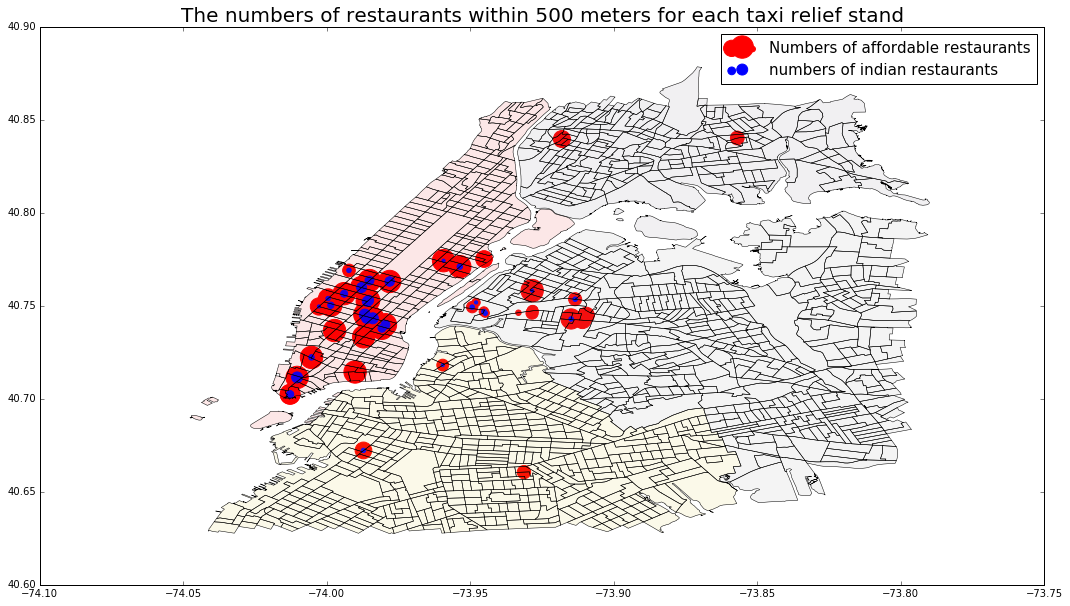

In [72]:

#westlimit=-74.045447; southlimit=40.681606; eastlimit=-73.895132; northlimit=40.863189
f, ax = plt.subplots(figsize = (18, 10))

ct_shape_Zoom=(ct_shape[ct_shape
                           .centroid
                           .apply(lambda c:c.x>-74.045 and c.x<-73.80 and c.y>40.63 and c.y<40.86)])


ax = ct_shape_Zoom.plot(column='BoroCode', alpha=0.1, linewidth=0.5, ax = ax)

ax = plt.scatter(df["lat"], df['lon'], color="red", s= df["affordable_restaurants"]*10, label = "Numbers of affordable restaurants")
ax = plt.scatter(df["lat"], df['lon'], color="blue", s= df["number_of_indian_restaurants"]*10, label= "numbers of indian restaurants")
ax = plt.legend(fontsize = 15, loc = 0)
ax = plt.title("The numbers of restaurants within 500 meters for each taxi relief stand", fontsize = 20)